**Importing  libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp


**IMPORTING DATA**

In [2]:
df=pd.read_csv('summer.csv')
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


**HANDLING NULL VALUES**

In [3]:
df.isnull().sum()


Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()



Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

**1. In how many cities Summer Olympics is held so far?**

In [5]:
n=0
for i in  df['City'].unique():
  n=n+1
  print(n,':',i)
print(f"There are total: {n} cities")

1 : Athens
2 : Paris
3 : St Louis
4 : London
5 : Stockholm
6 : Antwerp
7 : Amsterdam
8 : Los Angeles
9 : Berlin
10 : Helsinki
11 : Melbourne / Stockholm
12 : Rome
13 : Tokyo
14 : Mexico
15 : Munich
16 : Montreal
17 : Moscow
18 : Seoul
19 : Barcelona
20 : Atlanta
21 : Sydney
22 : Beijing
There are total: 22 cities


**2. Which sport is having most number of Gold Medals so far? (Top 5)**

In [6]:
gold_df=df[df['Medal']=='Gold']

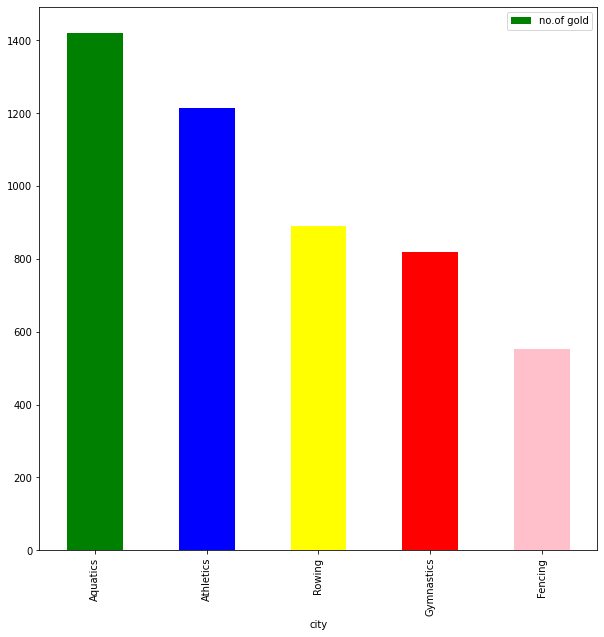

In [19]:
data=[]

for spt in gold_df['Sport'].unique():
  data.append([spt,len(gold_df[gold_df['Sport']==spt])])


pd.DataFrame(data,columns = ['city','no.of gold']).sort_values(by='no.of gold', ascending=False).head().plot(x = 'city', y = 'no.of gold', kind = 'bar',color=['green','blue','yellow','red','pink'] ,figsize = (10,10)) 
  

**4. Which player has won most number of medals? (Top 5)**

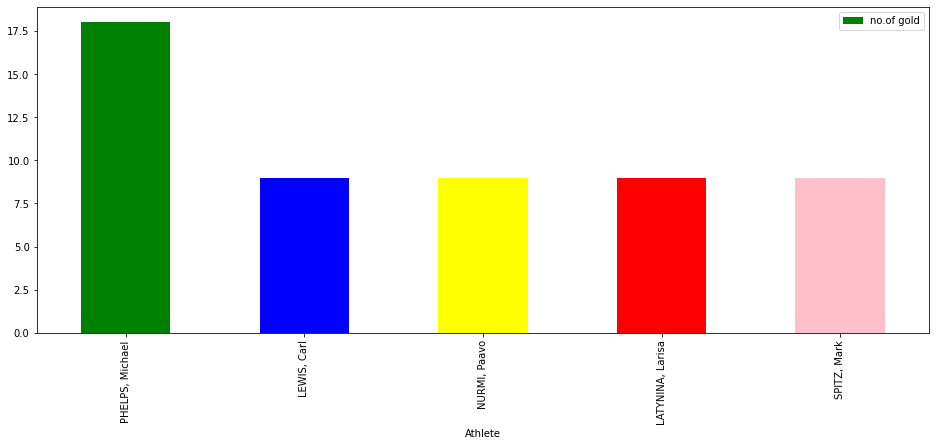

In [18]:
data=[]

for spt in gold_df['Athlete'].unique():
  data.append([spt,len(gold_df[gold_df['Athlete']==spt])])


pd.DataFrame(data,columns = ['Athlete','no.of gold']).sort_values(by='no.of gold', ascending=False).head().plot(x = 'Athlete', y = 'no.of gold', kind = 'bar',color=['green','blue','yellow','red','pink'], figsize = (16,6)) 
  

**3. Which sport is having most number of medals so far? (Top 5)**

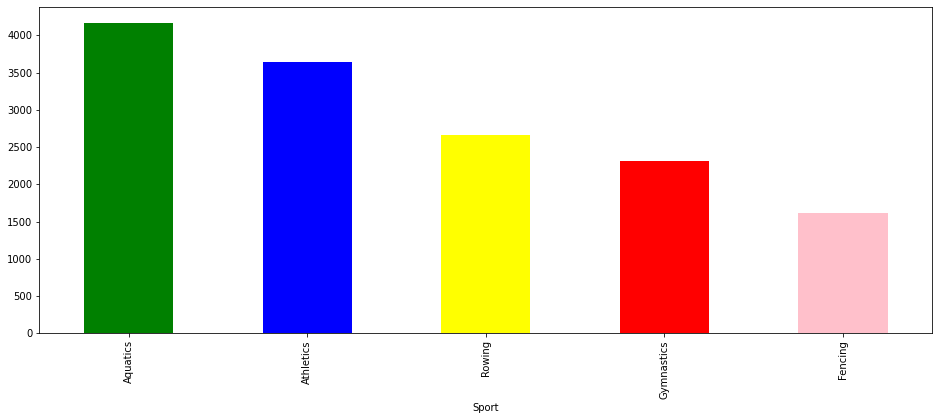

In [17]:
#Using pandas groupby
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar',color=['green','blue','yellow','red','pink'], figsize = (16,6))
 

**6.In which year India won first Gold Medal in Summer Olympics**

In [10]:
IND_df=gold_df[gold_df['Country']=="IND"]
IND_df.sort_values(by='Year',ascending=True).head(1) #.plot(x = 'Country', y = 'Year', kind = 'line', figsize = (10,10)) 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


**7. Which event is most popular in terms on number of players? (Top 5)**

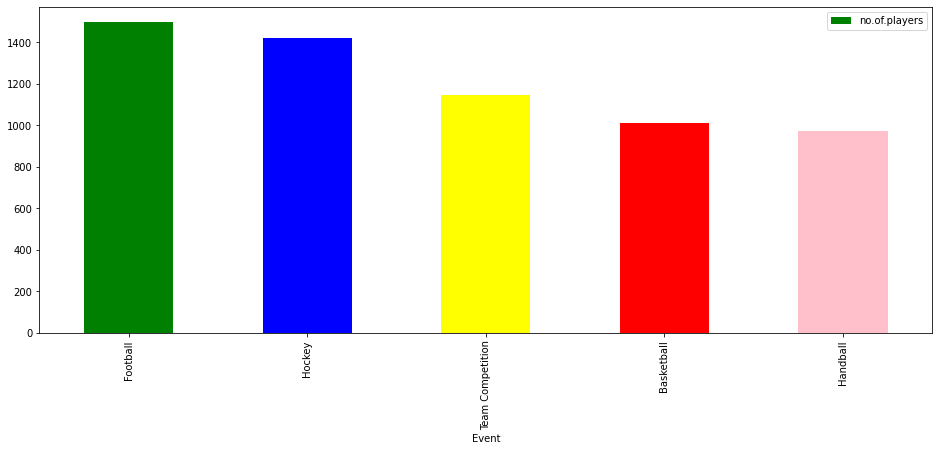

In [20]:
a=[]
for evt in df['Event'].unique():
  a.append([evt,len(df[df['Event']==evt])])
pd.DataFrame(a,columns=['Event','no.of.players']).sort_values(by='no.of.players',ascending=False).head().plot(x = 'Event', y = 'no.of.players', kind = 'bar',color=['green','blue','yellow','red','pink'], figsize = (16,6))

**8. Which sport is having most female Gold Medalists? (Top 5)**

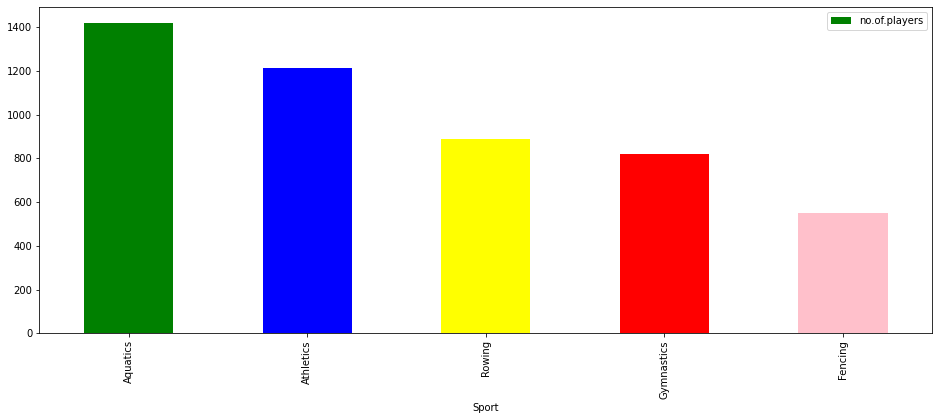

In [21]:
a=[]
for gen in gold_df['Gender'].unique():
  if(gen=="Women"):
    for sport in gold_df['Sport'].unique():
      a.append([sport,len(gold_df[gold_df['Sport']==sport])])
pd.DataFrame(a,columns=['Sport','no.of.players']).sort_values(by='no.of.players',ascending=False).head().plot(x = 'Sport', y = 'no.of.players', kind = 'bar',color=['green','blue','yellow','red','pink'], figsize = (16,6))